## Module 2 – Data Handling & Preprocessing_house_ML model_Linear_regressions

**Exploratory Data Analysis (EDA)** involves key steps like understanding the problem and data, data collection, data cleaning, descriptive statistics, data visualization, handling missing values and outliers, feature engineering, exploring variable relationships, and finally communicating insights.

These steps are iterative, helping to uncover patterns, identify anomalies, and form hypotheses for building better models and making informed decisions.  


  ---

  ## 🔹 EDA Steps for Machine Learning

  ### 1. **Understand the Problem & Dataset**

  * Identify **business objective** or ML task (classification, regression, clustering, etc.)
  * Define the Goal: Clarify the business goal or research question the data analysis aims to address.
  *Understand Variables: Identify the meaning of each variable, their data types (numerical, categorical), and any known data quality issues or constraints.

  * Load dataset (`pandas.read_csv`, SQL, etc.)
  * Check dataset shape (`df.shape`)
  * Display first few rows (`df.head()`)

  ---

  ### 2. **Data Collection**
  Gather all relevant raw data from appropriate sources, such as databases, CSV files, or APIs.
  ---

  ### 3. **Data Preparation and Cleaning**
  - Data Wrangling: Clean and organize the raw data into a format suitable for analysis.
  - Handle Missing Values: Identify and decide how to handle missing or null values, which can be by removal, imputation with the mean or median, or other methods depending on the data's distribution.
  - Handle Duplicates and Irregularities: Remove redundant data and address irregularities that can cause noise in the analysis.

  ### 3.1. **Data Types & Structure**

  * Inspect column types (`df.info()`)
  * Separate features into:

    * Numerical (continuous/discrete)
    * Categorical
    * Date/Time
    * Text/Unstructured
  * Identify target variable.

  ---

  ### 3.2 **Data Quality Check**

  * Missing values (`df.isnull().sum()`)
  * Duplicate records (`df.duplicated().sum()`)
  * Outliers detection (boxplots, IQR method, z-score)
  * Data entry errors (e.g., age = -5, salary = 9999999)

  ---
  ### 4. **Descriptive Statistics and Visualization**
  * Summary Statistics: Calculate descriptive statistics like mean, median, standard deviation, and frequency distributions to get a quick understanding of the dataset's central tendency and variability.
  * Visualize Distributions: Use histograms, box plots, and density plots to visualize the distribution of individual variables.
  ---

  ### 5. **Examine Relationships and Outliers**
  * Bivariate and Multivariate Analysis: Explore pairwise relationships between variables using scatter plots or more complex multivariate methods like heatmaps to identify patterns and correlations.
  * Outlier Detection: Identify and analyze outliers, which can skew results, and decide whether to remove or retain them based on the context.

  ### 5.1 **Univariate Analysis (Single Variable)**

  * Numerical features → Histogram, KDE, Boxplot, Summary stats (`df.describe()`)
  * Categorical features → Value counts, Bar plot, Pie chart

  ---

  ### 5.2 **Bivariate Analysis (Feature vs Target)**

  * Numerical vs Target:

    * Correlation (`df.corr()` + heatmap)
    * Scatter plots, boxplots
  * Categorical vs Target:

    * Grouped bar chart
    * Countplot with hue
    * Chi-square test (for independence)

  ---

  ### 5.3. **Multivariate Analysis**

  * Correlation matrix for numerical features
  * Pairplot/heatmap
  * Cross-tabulations
  * PCA/Dimensionality reduction (optional for visualization)

  ---
  ### 6. **Feature Engineering**
  Create new features or transform existing ones to better represent the underlying information and improve model performance.

  ---
  ### 6.1 **Feature Relationships**

  * Check multicollinearity (VIF score)
  * Identify strong predictors
  * Detect redundant features

  ---

  ### 6.2 **Feature Engineering Needs**

  * Encoding categorical variables (OneHot, Label Encoding)
  * Feature scaling (Normalization, Standardization)
  * Date/time feature extraction (day, month, weekday, etc.)
  * Domain-specific feature creation

  ---

  ### 6.3 **Class Imbalance Check (For Classification)**

  * Value counts of target variable
  * If imbalance exists → consider SMOTE, undersampling/oversampling, class weights

  ---
  ### 7. **Communicate Findings**
  Present the insights and discoveries from the EDA process to stakeholders.

  ---
  ### 8. **Iterate**
  EDA is an iterative process. You may need to revisit earlier steps to test new hypotheses, address emerging challenges, and refine your understanding of the data to build more robust models

  ### 10. **Key Insights & Hypothesis**

  * Summarize main findings
  * Identify which features are important
  * Document anomalies or patterns

  ---

  ✅ **Outcome of EDA** → Clean dataset + feature insights → Ready for preprocessing & model building.

  ---

In [ ]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# data read
path ="/content/drive/MyDrive/0.self_course_content_data_science/10.machine learning/Module 2 Bengaluru_House_Data.csv"
df = pd.read_csv(path,encoding="utf-8")
df.head()

In [ ]:
# - 1. DATA LOAD
# - 2. DATA INFO
# - 3. DATA CLEANING
#   - a. info
#   - b. remove unwanted columns
#   - c. duplicate
#   - d. null check
#   - e. clean null values (imputation of missing value )
#   - f. save the clean data

# - 4. DATA PREPROCESSING
    # - a. segregate categorical and numerical columns
    # - b. check the data pattern using graphs and show distributions
    # - c. data interpolation >> is a process of estimating data in a range, getting unknown values from known values
    # - d. data Feature Scalling
    # - e. To check outliers >> distplot, boxplot
    # - f. data encoding
    # - g. class imbalance >> one class has higeher percentage upsampling, downsampling, smote
    # - h. Assumptions of Machine Learning for Linear Regression
# - MACHINE LEARNING MODELING

#### Hidden Data

<!--
### Handling Missing Values

#drop all the rows
df.dropna()
#drop a column with missing value
df.dropna(axis=1)
#imputation of missing value with mean

df['B'].fillna(df['B'].mean())
df['B'].fillna(df['B'].median())

df.drop('deck', axis = 1, inplace=True)
#homework>> create a separate column with flag 1 and 0

df["flag"]=df.age.apply(lambda x: 1 if pd.isna(x) else 0)


# Feature Scalling
std_data = []
for i in list(df['total_bill']):
    zscore = (i-mean)/std
    std_data.append(zscore)


#scaling is optional because it doesnt change the distribution of data
#before scaling
sns.distplot(df['total_bill'])

#after scaling
sns.distplot(std_data)

from sklearn.preprocessing import StandardScaler
#Normalization/minmax scaling
from sklearn.preprocessing import MinMaxScaler

#unit vector
from sklearn.preprocessing import normalize
#robust scaling >> you have outliers the data
#X-median/IQR
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()


#data interpolation >>  is a process of estimating data in a range, getting unknown values from known values
1. Linear Interpolation
2. cubic interpolation
3. Polynomial interpolation

#linear interpolation

x_new = np.linspace(1, 5, 10)
x_new
y_interp = np.interp(x_new, x, y)
y_interp

#cubic interpolation

x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 8, 27, 64, 125])
plt.scatter(x, y)

from scipy.interpolate import interp1d

f = interp1d(x, y, kind = 'cubic')

x_new = np.linspace(1, 5, 10)
y_interp = f(x_new)


#polynomial interpolation

x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 4, 9, 1, 25])

p = np.polyfit(x, y, 2)

x_new = np.linspace(1, 5, 10)
y_interp = np.polyval(p, x_new)
plt.scatter(x_new, y_interp)

===========================================
=======================================

#data encoding >> converting categorical column to numeric
#Nominal/OHE
#label and ordinal encoding
#target guided ordinal encoding

#nominal ohe >> binary vectors for each category
#single married, in a relationship
#single > [1, 0,a 0]
#married > [0, 1, 0]
#separated > [0, 0, 1]

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

df = pd.DataFrame({"qualification": ["HS", "PG","GR", "HS", "PhD", "HS", "PG"]})
encoder = OrdinalEncoder(categories = [["HS", "GR", "PG", "PhD"]])
encoder.fit_transform(df[['qualification']])


#To check outliers >> distplot, boxplot
#dropping the outlier
#capping the outlier
#replace with mean and median
#Scaling and transformation

Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3-Q1
IQR

lower_fence = Q1-1.5*IQR
upper_fence = Q3+1.5*IQR

#dropping the outlier
df_filtered = df[(df.Salary >= lower_fence) & (df.Salary <= upper_fence)]

#replace the outliers with mean and median
df['Salary_mean_imputed'] = np.where((df.Salary >= upper_fence) | (df.Salary <= lower_fence), df['Salary'].mean(), df['Salary'])


#capping >> replacing outlier with the nearest values that is not outlier

lower_cap = df['Salary'].quantile(0.05) #lower cap as 5th percentile
upper_cap = df['Salary'].quantile(0.95)

df['Salary_capped'] = np.where(df['Salary'] < lower_cap, lower_cap,
                              np.where(df['Salary'] > upper_cap, upper_cap, df['Salary']))




#class imbalance >> one class has higeher percentage
#upsampling, downsampling, smote


import numpy as np
import pandas as pd
np.random.seed(1) #for reproducibility

no_samples = 1000
class_0_ratio = 0.9
no_class_0 = int(no_samples * class_0_ratio)
no_class_1 = 100

class_0 = {'feature1': np.random.normal(0, 1, no_class_0),
'feature2': np.random.normal(0, 1, no_class_0),
'target': [0]*no_class_0}


class_0 = pd.DataFrame(class_0)

class_1 = pd.DataFrame({'feature1': np.random.normal(3, 1, no_class_1),
'feature2': np.random.normal(3, 1, no_class_1),
'target': [1]*no_class_1})

df = pd.concat([class_0, class_1]).reset_index(drop = True)

df.target.value_counts(normalize = True)   # show in percentage use normalize true

df_minority = df[df.target == 1]
df_majority = df[df.target == 0]

#oversampling>>upsampling >>increasing the minority to majority no
from sklearn.utils import resample

df_minority_upsampled = resample(df_minority, replace=True, n_samples = len(df_majority), random_state =1)

#downsmapling
df_majority_downsampled = resample(df_majority, replace=False, n_samples = len(df_minority), random_state =1)


#SMOTE>> synthetic minority oversampling technique

from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 1000, n_redundant = 0, n_features=2, n_clusters_per_class = 1, weights = [0.90], random_state = 1)

import matplotlib.pyplot as plt
plt.scatter(df_final['f1'], df_final['f2'], c = df_final['target'])


# !pip install imblearn
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(df_final[['f1', 'f2']], df_final['target'])

df1 = pd.DataFrame(X, columns = ['f1', 'f2'])
df2 = pd.DataFrame(y, columns = ['target'])
oversample = pd.concat([df1, df2], axis = 1)

import matplotlib.pyplot as plt
plt.scatter(oversample['f1'], oversample['f2'], c = oversample['target'])

===========================================================
================================================================
===============================================================


 -->

# 🔹 EDA Steps for Machine Learning

### 1. **Data Load**

* Import libraries
* Load dataset (CSV, SQL, API, etc.)
* Preview dataset (`head`, `shape`)
---

✅ This outline now has both:

* Your **step-by-step workflow (load → clean → preprocess → model assumptions)**
* The **structured EDA stages (univariate, bivariate, multivariate, feature engineering, communication)**


## 1. Data Loading and Preprocessing.

In these steps, we will load the Bengaluru House Data dataset using pandas and perform an initial exploration to understand its structure and contents.

- **Data Import:** The dataset is loaded into a pandas DataFrame named `data`.
- **Shape:** The dataset contains 12,530 rows and 7 columns after initial cleaning.
- **Columns:**  
    - `location`: Area or locality of the property  
    - `size`: Number of bedrooms (e.g., "2 BHK", "4 Bedroom")  
    - `total_sqft`: Total area in square feet  
    - `bath`: Number of bathrooms  
    - `price`: Price of the property (in lakhs)  
    - `bhk`: Extracted number of bedrooms as integer  
    - `price_per_sqft`: Price per square foot

We will also check for missing values, data types, and unique values in key columns to guide further cleaning and preprocessing steps. This foundational understanding helps in identifying potential issues such as outliers, inconsistent data, and the need for encoding categorical variables.

---

### 2. **Data Info**

* Check dataset structure (`info`)
* Identify column data types (numerical, categorical, datetime, text)
* Identify target variable

In [ ]:
df.shape

In [ ]:
df.info()

### 3. **Data Cleaning**

* Inspect dataset info again
* Remove unwanted/irrelevant columns
* Handle duplicates
* Null value check
* Handle missing values (drop, mean/median/mode imputation, domain-specific methods)
* Save cleaned dataset

In [ ]:
# check null
df.isnull().sum()

In [ ]:
# 1.check DISTINCT VALUES  in each columns --> categorical values
df.nunique()  # -->return unique count number

In [ ]:
df['area_type'].unique()  # -->return the unique values

In [ ]:
df.columns

In [ ]:
for i in df.columns:
  if df[i].dtype == 'object':
    print(i, df[i].nunique())
    # print(df[i].value_counts())

    print('*'*20)

# The above loop prints the value counts for each column in the DataFrame,
# helping to understand the distribution and frequency of unique values in every column.

In [ ]:
df.isnull().sum()

In [ ]:
# drop --> inrelevent columns
df.drop(columns=['availability', 'society'],inplace=True)

In [ ]:
df.head()

# Remove NUll Values/Replace

In [ ]:
df

In [ ]:
df.isnull().sum()

In [ ]:
# replace the value
# locations
df["location"].mode()[0]

In [ ]:
# replace
df["location"].fillna(df["location"].mode()[0],inplace=True)
df.isnull().sum()

In [ ]:
# replace the size with mode
df["size"].mode()[0]

In [ ]:
df["size"].fillna(df["size"].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
df["bath"].mode()[0]

In [ ]:
df["bath"].fillna(df["bath"].mode()[0],inplace=True)

In [ ]:
df["balcony"].fillna(df["balcony"].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
df.head()

In [ ]:
df.dtypes

# Check DataTypes and correct with cleaning

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
(df['size'][0][0])
# using simple indexing

In [ ]:
int(df['size'][0][0])

In [ ]:
# using split methods
df["size"][0].split(" ")

In [ ]:
df["size"][0].split(" ")[0]

In [ ]:
# size datatype change object into int
int(df["size"][0].split(" ")[0])

In [ ]:
# # size columns cleaning
# df["size"].str.split(" ")[0][0]

In [ ]:
def clean_size(x):
    return int(x.split(" ")[0])

In [ ]:
def clean_size(x):
  try:
    return int(x.split(" ")[0])
  except:
    return int(float(x))
# if column has null value then use float concept

In [ ]:
clean_size("2.5")

In [ ]:
df["bhk"] = df["size"].apply(clean_size)

In [ ]:
df.head()

In [ ]:
df.drop(columns=["size"],inplace=True)

In [ ]:
df.dtypes

In [ ]:
df.head()

In [ ]:
# df['total_sqft'].astype("float")

In [ ]:
df["total_sqft"].unique()[:60]

In [ ]:
df["total_sqft"].head(35)

In [ ]:
df["total_sqft"][30]

In [ ]:
d = df["total_sqft"][30].split("-")
d

In [ ]:
d[0]

In [ ]:
d[0].strip()

In [ ]:
float(d[0].strip())

In [ ]:
(float(d[0].strip()) +float(d[1].strip()))/2

In [ ]:
def convertRange(x):
    temp = x.split('-')
    if len(temp) == 2:
        return (float(temp[0]) + float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [ ]:
df["total_sqft"]=df["total_sqft"].apply(convertRange)

In [ ]:
df.isnull().sum()

In [ ]:
df["total_sqft"].fillna(df["total_sqft"].mean(),inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
df.dtypes

In [ ]:
df.head()

In [ ]:
# save the clean file
df.to_csv("Cleaned_data.csv",index=False)
# df.to_csv("Cleaned_data.csv",index=False)

### 4. **Data Preprocessing**

* Segregate categorical & numerical columns
* Explore data distribution (graphs, histograms, boxplots, distplots)
* Data interpolation (estimate unknown values from known values)
* Handle class imbalance (Upsampling, Downsampling, SMOTE, Class weights)
* Feature scaling (Normalization, Standardization)
* Outlier detection & treatment (boxplot, z-score, IQR method)
* Data encoding (Label Encoding, OneHot Encoding)

* find the correlations bw variables
* Check assumptions of ML models (e.g., Linear Regression – linearity, normality, multicollinearity, homoscedasticity)


## Perform EDA for analysis data or understand the data nature

### 5. **Descriptive Statistics & Visualization**

* Summary statistics (`describe`)
* Numerical feature distribution (histogram, KDE, boxplot)
* Categorical feature distribution (countplot, bar chart, pie chart)


In [ ]:
# Summary statistics for numerical features
print("Descriptive Statistics for Numerical Features:")
print(df.describe())

In [ ]:
print(df.describe(include="O"))
#

In [ ]:
df.describe(include="all")
#

#### CHECK numerical columns and categorical Columns

In [ ]:
df.dtypes

In [ ]:
df.columns
# show the ALL columns name as list

In [ ]:
for i in df.columns:
  if df[i].dtype == 'object':
    print(i)

In [ ]:
# Visualize distributions of numerical features
numerical_cols = df.select_dtypes(include=np.number).columns
print("\nVisualizing Distributions of Numerical Features:")
for col in numerical_cols:
    if col != 'price_boxcox': # Exclude the transformed price for now if you want to focus on original
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

In [ ]:
# Visualize distributions of categorical features
categorical_cols = df.select_dtypes(include='object').columns
print("\nVisualizing Distributions of Categorical Features:")
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10]) # Display top 10 for readability
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

### 6. **Examine Relationships**

#### 6.1 **Univariate Analysis**

* Individual variable distributions

In [ ]:
# Visualize distributions of numerical features
numerical_cols = df.select_dtypes(include=np.number).columns
print("\nVisualizing Distributions of Numerical Features:")
for col in numerical_cols:
    if col != 'price_boxcox': # Exclude the transformed price for now if you want to focus on original
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

# Visualize distributions of categorical features
categorical_cols = df.select_dtypes(include='object').columns
print("\nVisualizing Distributions of Categorical Features:")
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10]) # Display top 10 for readability
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()




#### 6.2 **Bivariate Analysis**

* Numerical vs Target (correlation, scatterplot, boxplot)
* Categorical vs Target (grouped bar chart, countplot, chi-square test)

#### 6.3 **Multivariate Analysis**

* Correlation matrix & heatmap
* Pairplots
* Cross-tabulations
* PCA / dimensionality reduction (optional for visualization)


In [ ]:
# Bivariate Analysis (Numerical vs Target)
print("\nBivariate Analysis (Numerical vs Target):")
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'price' in numerical_cols:
    numerical_cols.remove('price') # Exclude target variable from features
    if 'price_boxcox' in numerical_cols:
        numerical_cols.remove('price_boxcox') # Exclude transformed target as well

    for col in numerical_cols:
        plt.figure(figsize=(8, 4))
        sns.scatterplot(data=df, x=col, y='price')
        plt.title(f'Scatter plot of {col} vs Price')
        plt.xlabel(col)
        plt.ylabel('Price')
        plt.show()

# Multivariate Analysis (Correlation Matrix and Heatmap)
print("\nMultivariate Analysis (Correlation Matrix):")
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### 7. **Feature Engineering**

* Create new features
* Extract date/time features (day, month, weekday, etc.)
* Domain-specific feature creation


In [ ]:
# Feature Engineering: Create 'price per square foot'
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']
display(df.head())

### 9. **Communicate Findings**

* Present visualizations & reports
* Share insights with stakeholders

### Summary of Key EDA Findings

Based on the Exploratory Data Analysis performed:

* **Data Overview:** We loaded and inspected the Bengaluru House Data, understanding its shape, columns, and initial data types.
* **Data Cleaning:**
    * Missing values were handled for `location`, `size`, `total_sqft`, `bath`, and `balcony` by imputation with the mode or mean.
    * Irrelevant columns (`availability`, `society`) were dropped.
    * Data types were corrected, specifically converting `size` to `bhk` (integer) and `total_sqft` to float, handling ranges.
    * Outliers were addressed in `total_sqft`, `bath`, `price`, and `bhk`.
* **Distribution Analysis:** Visualizations (histograms, countplots) provided insights into the distribution of individual features. We observed the distribution of numerical features and the counts of different categories in `area_type` and `location`.
* **Relationship Analysis:**
    * Scatter plots showed relationships between numerical features and `price`.
    * A correlation matrix highlighted the linear relationships between numerical variables. `total_sqft`, `bath`, and `bhk` show positive correlations with `price`.
* **Feature Engineering:** A new feature, `price_per_sqft`, was created, which can be a significant predictor of house prices.
* **Skewness Handling:** The `price` column's skewness was addressed using a Box-Cox transformation, resulting in a more normally distributed variable (`price_boxcox`).

These findings provide a solid foundation for the next steps in data preprocessing and machine learning model building.

### 10. **Iterate & Refine**

* Revisit earlier steps if needed
* Test new hypotheses


### 11. **Key Insights & Hypotheses**

* Summarize final findings
* Highlight important features
* Document anomalies & patterns


In [ ]:
import scipy.stats as stats

# Perform ANOVA test to see if there is a significant difference in price between different area types
# First, we need to separate the prices by area type
area_types = df['area_type'].unique()
price_by_area_type = [df['price'][df['area_type'] == area_type] for area_type in area_types]

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*price_by_area_type)

print(f"ANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis. There is a significant difference in price between different area types.")
else:
    print("\nConclusion: Fail to reject the null hypothesis. There is no significant difference in price between different area types.")

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table of 'area_type' and 'balcony'
contingency_table = pd.crosstab(df['area_type'], df['balcony'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")

# Interpret the results
alpha = 0.05
if p < alpha:
    print("\nConclusion: Reject the null hypothesis. There is a significant association between area type and number of balconies.")
else:
    print("\nConclusion: Fail to reject the null hypothesis. There is no significant association between area type and number of balconies.")

## Prepare the data for  machine Learning

In [ ]:
# EDA-Info,shape
# Handling Missing Values
# Handling Outliers

# Handling Skewness

# Data Encoding

# Feature Scaling -Normalization and Standardization

# Feature Engineering

In [ ]:
# load the clean data
import pandas as pd
# df = pd.read_csv("clean_data_for_ml_eda.csv")
df= pd.read_csv("https://media.githubusercontent.com/media/shahil04/ds_materials/refs/heads/main/8.0_Machine%20Learning/class/ml_projects/1.house_price_predictions/clean_data_for_ml_eda.csv")
df.head()

df1 = df.copy()  # for  comparison data after Preprocessing

In [ ]:
df1

### 1. Remove unwanted columns


In [ ]:
# df.drop(columns=["Unnamed: 0"],inplace=True)
df.drop(columns=["availability"],inplace=True)

In [ ]:
df

# 1. Handling Outliers

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# check outliers
# df['total_sqft']
plt.boxplot(df['total_sqft'])
plt.show()

sns.boxenplot(df['total_sqft'])
plt.show()
sns.violinplot(df['total_sqft'])
plt.show()

In [ ]:
# Q. show the details of sales above 30k sqrtfeet
df[df["total_sqft"]>30000]

In [ ]:
df = df[df["total_sqft"]<30000]


In [ ]:
df[df["total_sqft"]>30000]

In [ ]:
# bath	balcony	price	bhk
l = ['bath',	'balcony',	'price',	'bhk']
for i in l:
  print(i)
  sns.boxenplot(df[i])
  plt.show()

In [ ]:
# bath 20,pric 3000, bhk 20 conditions for outliers
df = df[df["bath"]<20]
df = df[df["price"]<3000]
df = df[df["bhk"]<20]

# df[(df["bath"]>20) ! (df["price"]>30000) ! (df["bhk"]>20)]

In [ ]:
df.head()

In [ ]:
# check outliers for categorical values
df['area_type'].value_counts()

In [ ]:
df['location'].value_counts()

In [ ]:
(df['location'].value_counts().reset_index()["count"]==1).sum()

# 2. Handling Skewness

Skewness is a statistical measure that describes the asymmetry of a probability distribution, indicating whether the data is stretched more toward the left or right of the mean



In [ ]:
# check the distributions
# histogram only for numerical columns -->specialy from continous data
for i in df.columns:
  if df[i].dtype != 'object':
    lab = i+" Skewness: "+str(df[i].skew())
    # print(lab)
    # print(df[i].skew())
    sns.histplot(df[i],kde=True)

    plt.legend([lab])
    plt.show()

In [ ]:
# skewness handle
df['price'].skew()

In [ ]:
# https://machinelearningmastery.com/skewness-be-gone-transformative-tricks-for-data-scientists/
# 1. sqrt
# 2. square
# 3. log
# 4. box-cox

In [ ]:
import numpy as np
np.sqrt(df['price']).skew()

In [ ]:
np.square(df['price']).skew()

In [ ]:
np.log(df['price']).skew()

In [ ]:
sns.histplot(np.log(df['price']),kde=True)

In [ ]:
from scipy.stats import boxcox

df2=pd.DataFrame()
# Apply Box-Cox transformation to the 'price' column
# df['total_sqft_box_cox'], lambda_price = boxcox(df['total_sqft'])
df2['total_sqft_box_cox'], lambda_price = boxcox(df['total_sqft'])
# Display the skewness of the original and transformed price
print(f"Original Price Skewness: {df['total_sqft'].skew()}")
print(f"Box-Cox Transformed Price Skewness: {df2['total_sqft_box_cox'].skew()}")

# Visualize the distribution of the transformed price
sns.histplot(df2['total_sqft_box_cox'], kde=True)
plt.title('Distribution of Box-Cox Transformed Price')
plt.xlabel('Box-Cox Transformed Price')
plt.ylabel('Frequency')
plt.show()

# 3. Feature Scaling -Normalization and Standardization

## Scaling
- change the range of value in fixed range
- Normalization (min-max scaler) -->range (0-1)/(-1 to 1)
- Standarization (z-score) --> mean=0, std=1

In [ ]:
# x-xmin/xmax-xmin
li = [1,2,3,4]
for x in li:
  new_x = (x-min(li))/(max(li)-min(li))

  print(new_x)

In [ ]:
# !pip install scikit-learn
# scaling
from sklearn.preprocessing import  MinMaxScaler,StandardScaler, RobustScaler

# MinMaxScaler --> range(0-1) ,it not handle outliers
# StandardScaler -->mean 0, std =1 --> std normal distributions
#  RobustScaler --> it handle the outliers


In [ ]:
# create object
min_max = MinMaxScaler()

min_max.fit(df[["total_sqft"]])  # it get the min and max value

min_max.transform(df[["total_sqft"]])  # it apply the formula in data and transform

In [ ]:
# change the range of total_sqft into 0 to 1
min_max.fit_transform(df[["total_sqft"]])  # find min max and transform data

scaled_data = min_max.fit_transform(df[["total_sqft"]])
scaled_data

In [ ]:
# reassign
df["total_sqft"] = scaled_data
df.head()

In [ ]:
scaler = StandardScaler()
# change the range of where mean=0 and std =1
scaled_data = scaler.fit_transform(df[["total_sqft"]])
scaled_data

In [ ]:
# robust
scaler = RobustScaler()
# Why use robust scaling
# Handles outliers: It is robust to the presence of outliers, which can distort other scaling methods that rely on the mean and standard deviation.
# Less sensitive to skewed data: It is suitable for datasets with non-normal distributions, which are common in real-world data.
# Improves model performance:
# X_scaled=(X-X_median)/IQR)
scaled_data = scaler.fit_transform(df[["total_sqft"]])
scaled_data

In [ ]:
df


## 4.Encoding

Encoding in machine learning is the process of converting categorical data(like text or non-numeric labels) into a numerical format that machine learning algorithms can understand and process

In [ ]:
df.head()

## encoding
* types
  1. nominal/Label encoding --> only name in data (ranking is not important)
  2. ordinal encodnig --> (ranking is important)
  3. one-hot encoding/ df_dummies -->( all are equal)
  

In [ ]:
# text column
df["area_type"].unique()

In [ ]:
df["area_type"].head(5)

In [ ]:
# sk-learn
# preprocessing
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder , OneHotEncoder

label= LabelEncoder()  #change the categorical data  into number without order

l = label.fit_transform(df["area_type"])

print(l[:50]) # print 1st 50 data point

In [ ]:
label.classes_


In [ ]:
df["area_type"].unique()

In [ ]:
# Ordinal for apply the order in distinct values

ord = OrdinalEncoder(categories=[["Super built-up  Area","Built-up  Area","Plot  Area","Carpet  Area"]])

o = ord.fit_transform(df[["area_type"]])
print(o[:50])

# o = ord.fit_transform(df["area_type"].values.reshape(-1,1))

In [ ]:
ord.categories_  # show the order of data

In [ ]:
# show the data with actual data
for i in zip(df["area_type"],o):
  print(i)

![](https://miro.medium.com/v2/1*ggtP4a5YaRx6l09KQaYOnw.png)

In [ ]:
# One-hot encoding is a process that converts categorical data into a numerical format that machine learning algorithms can process. It creates new binary (0 or 1) columns for each unique category in a feature, with a "1" indicating the presence of that category and "0" indicating its absence for a given row
# Binary number --> 0,1 if value then 1 and rest of then equal 0
ohe = OneHotEncoder()

o =ohe.fit_transform(df[["area_type"]]).toarray()

In [ ]:
o

In [ ]:
ohe.get_feature_names_out()

In [ ]:
area_ohe = pd.DataFrame(o,columns=ohe.get_feature_names_out())
area_ohe

In [ ]:
df

In [ ]:
    df= df.reset_index(drop=True)
    print("\nDataFrame after reset_index(drop=True):")
    df

In [ ]:
# add data into existing df and area_ohe into df1

df = pd.concat([df,area_ohe],axis=1)
df

In [ ]:
df = df.drop('area_type', axis=1)

In [ ]:
df.isnull().sum()

In [ ]:
df

In [ ]:
label= LabelEncoder()  #change the categorical data  into number without order

# l = label.fit_transform(df["location"])
df["location"] = label.fit_transform(df["location"])

In [ ]:
df

In [ ]:
# afer preprocessing data save for ml 
df.to_csv("data_preprocess_for_ml.csv",index=False)

### create simple Linear Model model 

Y =mx + c

* use data: 
    - X = df['total_sqft']
    - y = df[df['price']]

create a model to find price(y) of house using only total sqft. data as x,

In [ ]:
# from simple data
df1

In [ ]:
# data one x and one y p
X = df1[['total_sqft']]
y = df1['price']
X.shape
y.shape

In [ ]:

plt.scatter(X, y)
plt.plot([0,20000], [0, 3000] ,'r')
plt.plot([0,15000], [0, 3000] ,'r')

In [ ]:
# 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

In [ ]:
print(lr.intercept_)
print(lr.coef_)

# y= 0.104*X + (-48.5)  # model 

# y= mx + c

In [ ]:
# 3. Get the intercept and coefficient
intercept = lr.intercept_
coefficient = lr.coef_[0] # For simple linear regression, coef_ is an array

# 4. Generate points for the regression line
# You need a range of x-values to plot the line
x_line = np.linspace(X.min(),X.max(), 100).reshape(-1, 1)

y_line = coefficient * x_line + intercept

# 5. Plot the original data points and the regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(x_line, y_line, color='red', label=f'Regression Line: y = {coefficient:.2f}x + {intercept:.2f}')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.title('Linear Regression Line')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
lr.score(X,y)

In [ ]:
df.columns

In [ ]:
lr.fit(df1[['total_sqft','bhk','bath']], df1['price'])
lr.score(df1[['total_sqft','bhk','bath']], df1['price'])

In [ ]:
print(lr.coef_)

### How to we know which columns important or which not 

In [ ]:
df1

### 5. **Feature Relationships**

* Check multicollinearity (VIF)
* Identify strong predictors
* Remove redundant features


Multicollinearity is a situation in a multiple regression model where two or more independent variables are highly correlated, meaning they have a linear relationship and provide redundant information. This makes it difficult to determine the independent effect of each variable on the dependent variable, potentially leading to unreliable model results and wider confidence intervals. 

1. VIF
2. RFE 

 VIF (Variance Inflation Factor) is a common metric for detecting multicollinearity in a regression model.

Recursive Feature Elimination (RFE) is a feature-selection method that helps you automatically remove variables causing multicollinearity or low predictive value.

In [288]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Separate features (X) from the target variable (y)


numerical_cols_original = df1.select_dtypes(include=np.number).columns.tolist()
# Create a DataFrame with just the numerical features from the original df
numerical_features_df = df1[numerical_cols_original]
numerical_features_df = numerical_features_df.drop('price',axis=1)
numerical_features_df

,total_sqft,bath,balcony,bhk
0,1056.0,2.0,1.0,2
1,2600.0,5.0,3.0,4
2,1440.0,2.0,3.0,3
3,1521.0,3.0,1.0,3
4,1200.0,2.0,1.0,2
...,...,...,...,...
12700,1715.0,3.0,3.0,3
12701,3453.0,4.0,0.0,5
12702,3600.0,5.0,2.0,4
12703,1141.0,2.0,1.0,2


In [289]:
# Handle potential infinite VIF if there's perfect multicollinearity (e.g., constant column)
# Add a small constant to avoid division by zero if a column has zero variance
numerical_features_df = numerical_features_df + 1e-9

# Calculate VIF for each numerical feature
vif_data = pd.DataFrame()

### VIF (Variance Inflation Factor) is a common metric for detecting multicollinearity in a regression model.

In [290]:
vif_data["feature"] = numerical_features_df.columns
# Ensure the data type is float for variance_inflation_factor
vif_data["VIF"] = [variance_inflation_factor(numerical_features_df.values.astype(float), i)
                   for i in range(numerical_features_df.shape[1])]

print("Variance Inflation Factor (VIF) for Numerical Features:")
display(vif_data.sort_values(by="VIF", ascending=False))


Variance Inflation Factor (VIF) for Numerical Features:


,feature,VIF
3,bhk,26.501702
1,bath,26.371826
2,balcony,3.677760
0,total_sqft,2.960528



### **Standard VIF Guidelines**

| VIF Value | Interpretation                              | Action                                                                             |
| --------- | ------------------------------------------- | ---------------------------------------------------------------------------------- |
| **1–5**   | Moderate correlation but usually acceptable | Often *no action* needed                                                           |
| **> 5**   | Potentially concerning multicollinearity    | Investigate further (correlations, model design)                                   |
| **> 10**  | Serious multicollinearity problem           | Typically warrants correction (remove or combine predictors, regularization, etc.) |

### **More Nuanced View (Used in Practice)**

* **VIF > 2.5** may already be problematic in **small samples** or **noisy data**.
* **VIF > 4** is sometimes used as a cutoff in **econometrics**.
* **VIF > 10** is the **classical rule of thumb** from older regression diagnostics (e.g., Kutner, Nachtsheim & Neter).

### **Why VIF Thresholds Vary**

Threshold choice depends on:

* **Model purpose** (prediction vs. inference)
* **Sample size**
* **Acceptable variance inflation**
* **Domain norms** (e.g., social sciences vs. engineering)

### **Quick Practical Advice**

* **If inference (p-values, coefficients) matters:** aim for **VIF < 5**, ideally **< 3**.
* **If only prediction matters:** higher VIFs are more tolerable—regularized models (Lasso/Ridge) can handle collinearity without removing variables.


### **suggest:**

1. **Check correlation matrix** between bhk, bath, total_sqft.
2. **Try dropping one of (bhk, bath)** and compare model metrics.


<!-- Here’s a clear interpretation of your VIF values and what you should do next:

---

## **Interpretation of Your VIF Table**

| Feature        | VIF       | Interpretation                   |
| -------------- | --------- | -------------------------------- |
| **bhk**        | **26.50** | Extremely high multicollinearity |
| **bath**       | **26.37** | Extremely high multicollinearity |
| **balcony**    | 3.68      | Acceptable / moderate            |
| **total_sqft** | 2.96      | Acceptable                       |

### **Conclusion**

You have **serious multicollinearity** between **bhk** and **bath**.

A VIF above **10** is considered severe; both of these are >26, which means the variables are highly redundant.

---

## **Why is bhk and bath highly collinear?**

In real estate datasets, this is common:

* More **BHK → more bathrooms**
* Bathrooms scale with apartment size & number of rooms
* Thus they tend to be strongly correlated

Your model is probably struggling to distinguish their individual effects.

---

## **What you should do**

### **Option 1 (Best for interpretability): Remove one of them**

Check which one is more predictive individually:

* Compare model performance after dropping **bhk**
* Compare performance after dropping **bath**

Keep the one that improves validation score.

### **Option 2: Combine them into a single engineered feature**

Examples:

* **bath_per_bhk = bath / bhk**
* **rooms_ratio = bhk / total_sqft**
* **utility_score = bhk + bath**

This often reduces multicollinearity while keeping signal.

### **Option 3: Use regularization (Ridge or Lasso)**

If you use:

* **Lasso** → May drop one variable automatically
* **Ridge** → Keeps both but reduces instability

This is good if prediction (not coefficient interpretability) is your goal.

### **Option 4: Centering variables (mean subtraction)**

This helps numerically but **does not actually fix** collinearity—just makes coefficients more stable.

---

## **Recommended next step**

I suggest:

1. **Check correlation matrix** between bhk, bath, total_sqft.
2. **Try dropping one of (bhk, bath)** and compare model metrics.

If you want, send me your correlation matrix or your model goal (prediction vs. interpretability), and I’ll tell you *exactly* which option is best for your dataset. -->


In [ ]:
# Identify features with high VIF to remove
# Based on the calculated VIF values, both 'bath' (VIF: 26.96) and 'bhk' (VIF: 26.31) have high multicollinearity. This is likely because the number of bathrooms and the number of bedrooms are often strongly related to each other and possibly to the total square footage of the property.

# Having high multicollinearity between features can affect the interpretation and stability of some linear models. You might consider:

# Removing one of the highly correlated features: For example, you could remove either 'bath' or 'bhk'.
# Using techniques less sensitive to multicollinearity: Models like Ridge or Lasso regression include regularization that can handle multicollinearity.
# Combining features: Create a new feature that represents the relationship between 'bath' and 'bhk'.
# Would you like me to help you explore any of these options, or would you prefer to proceed with the current features?

### RFE 
Recursive Feature Elimination (RFE) is a feature selection technique that works by iteratively training a model, ranking its features by importance, and removing the least important ones until a desired number of features is reached


https://www.machinelearningmastery.com/rfe-feature-selection-in-python/

In [291]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X = df[['total_sqft', 'bath', 'bhk', 'balcony']]
y = df['price']

model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
rfe = rfe.fit(X, y)

print("Selected Features:", X.columns[rfe.support_].tolist())


Selected Features: ['total_sqft', 'bath', 'balcony']


In [292]:
# Using RFECV (Automatically finds optimal number of features)
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

rfecv = RFECV(estimator=LinearRegression(), cv=5)
rfecv.fit(X, y)

print("Optimal number of features:", rfecv.n_features_)
print("Selected features:", X.columns[rfecv.support_].tolist())


Optimal number of features: 3
Selected features: ['total_sqft', 'bath', 'balcony']


## 6. Correlations

Based on the correlation matrix:

*   **Positive Correlations with Price:** `total_sqft`, `bath`, and `bhk` show positive correlations with the target variable `price`. This is expected, as larger properties with more bathrooms and bedrooms typically have higher prices.
*   **Strong Correlation between Bath and BHK:** There is a strong positive correlation between `bath` and `bhk`, which was also highlighted by the VIF analysis.
*   **Price per Square Foot:** The engineered feature `price_per_sqft` also shows a positive correlation with price, although its relationship with the original numerical features might need further investigation.
*   **Other Correlations:** Review the heatmap in the previous output for specific correlation values between all numerical features.

## Correlations

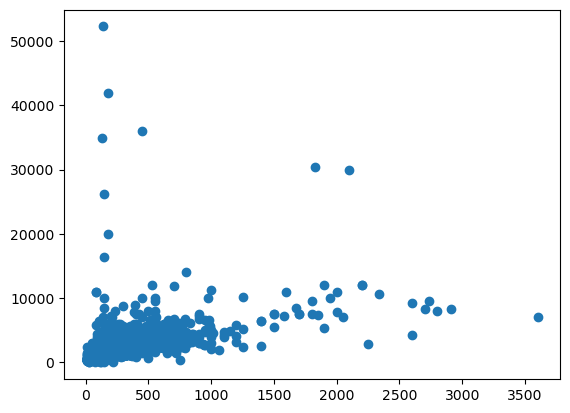

In [293]:
# create a bi-variant using price and total_sqft
plt.scatter(df1["price"],df1["total_sqft"])
plt.show()


Multivariate Analysis (Correlation Matrix):


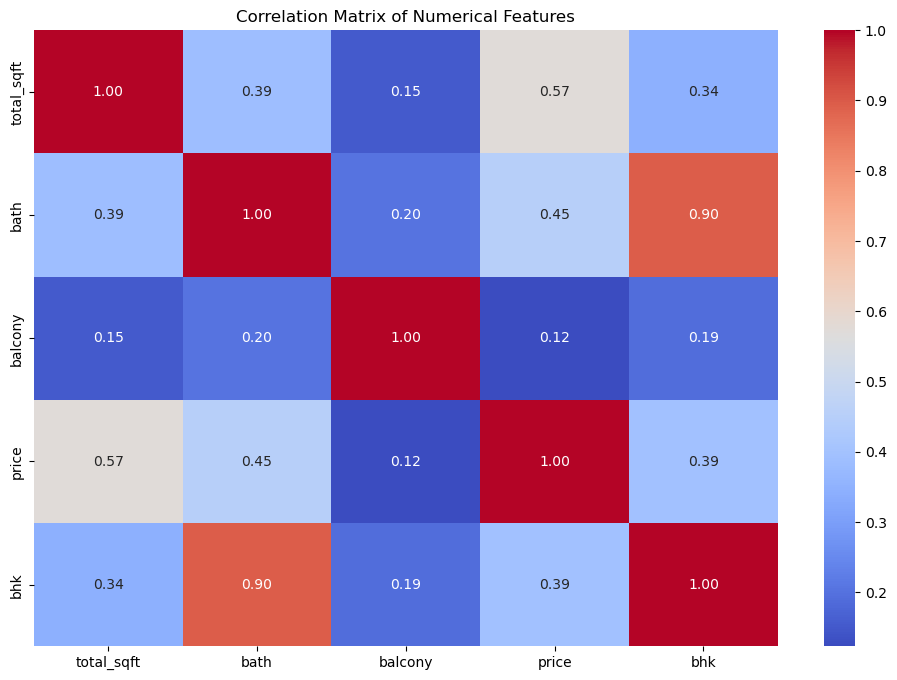

In [295]:
# Multivariate Analysis (Correlation Matrix and Heatmap)
print("\nMultivariate Analysis (Correlation Matrix):")
numerical_df = df1.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
# Final Data /Featrue Selection for Machine Learning Models
# then save the data
# Preprocess the data 
# the use the data for model

In [ ]:
# # prepared_data for ml save
# df.to_csv("prepared_ml_data.csv",index=False)

Encode → Scale → Feature Select → Model

In [296]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LinearRegression

# pipe = Pipeline([
#     ('encode', OneHotEncoder(handle_unknown='ignore')),
#     ('scale', StandardScaler(with_mean=False)),   # if sparse matrix after OHE
#     ('select', RFE(LinearRegression(), n_features_to_select=5)),
#     ('model', LinearRegression())
# ])


## Model Create |

In [297]:
# import
df = pd.read_csv(r"clean_data_for_ml_eda.csv")
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2


In [ ]:
## Model Building
# 1. select the numerical columns
# 2. seprate the x and y
# 2.1 split the data into training testing
# 3. load the algorithms and create the object of algoritms
# 4. train the model --> find the pattern value from data
# 5. test then model/predict
# 6. Evaluate/accuracy the model

# 7. fine tuning the model(for improve accuracy)

In [298]:
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2


In [299]:
# 1. select the numerical columns
df = df.drop(columns=["area_type","location",'availability'], axis=1)

In [300]:
df.head()

,total_sqft,bath,balcony,price,bhk
0,1056.0,2.0,1.0,39.07,2
1,2600.0,5.0,3.0,120.00,4
2,1440.0,2.0,3.0,62.00,3
3,1521.0,3.0,1.0,95.00,3
4,1200.0,2.0,1.0,51.00,2


In [301]:
# 2. seprate the x and y
X = df.drop(columns=["price"])
y = df["price"]

In [302]:
y

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
12700    112.00
12701    231.00
12702    400.00
12703     60.00
12704    488.00
Name: price, Length: 12705, dtype: float64

In [303]:
# 2. split the data into training testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state =0)

print(X_train.shape)
print(X_test.shape)

(10164, 4)
(2541, 4)


In [304]:
# 3. load the algorithms and create the object of algoritms
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [305]:
# 4. train the model --> find the pattern value from data
lr.fit(X_train,y_train)

LinearRegression()

In [306]:
# coffecient, intercept
print(lr.coef_)
print(lr.intercept_)

[ 0.0548277  35.47419283 -0.7458608  -4.50491236]
-54.24470005164876


In [307]:
# check the trainning accuracy
lr.score(X_train,y_train)

0.3945484624688548

In [308]:
# check the testing accuracy
lr.score(X_test,y_test)

0.3805866920021087

In [309]:
# 5. test then model/predict
y_pred = lr.predict(X_test)
y_pred

array([  61.65700006, 1302.59825339,   61.77569669, ...,   62.25777216,
        116.39744135,   68.9912257 ])

In [310]:
y_test

10850     60.00
4596     660.00
526       25.00
12024     45.75
6916      56.58
          ...  
8731      35.00
11351     32.49
2378      39.35
1437      65.00
3598      30.00
Name: price, Length: 2541, dtype: float64

In [311]:
X_test

,total_sqft,bath,balcony,bhk
10850,1080.0,2.0,1.0,3
4596,2400.0,40.0,0.0,43
526,1000.0,2.0,1.0,2
12024,984.0,2.0,1.0,2
6916,1200.0,3.0,2.0,3
...,...,...,...,...
8731,825.0,2.0,1.0,2
11351,1125.0,2.0,1.0,2
2378,1036.0,2.0,3.0,2
1437,1445.0,3.0,2.0,3


In [312]:
# 1000,2,1,2 -->price
sqrt = int(input("Enter total_sqft: "))
bath = int(input("Enter number of bathrooms: "))
bhk = int(input("Enter number of bedrooms (BHK): "))
balcony = int(input("Enter number of balcony: "))

lr.predict([[sqrt,bath,bhk,balcony]])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([132.82101771])

In [ ]:
# save the model
import pickle
pickle.dump(lr,open("lrmodel.pkl","wb"))

In [ ]:
# load the model
model = pickle.load(open("lrmodel.pkl","rb"))

sqrt = int(input("Enter total_sqft: "))
bath = int(input("Enter number of bathrooms: "))
bhk = int(input("Enter number of bedrooms (BHK): "))
balcony = int(input("Enter number of balcony: "))

model.predict([[sqrt,bath,bhk,balcony]])

In [ ]:
# 6. Evaluate/accuracy the model
# 7. fine tuning the model(for improve accuracy)

==================================================================================


In [ ]:
lr =LinearRegression()
# Train the model
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

In [ ]:
# test
y_pred = lr.predict(X_test)
y_pred

In [ ]:
# errors CALCULATE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

In [ ]:
# R2score
r2_score(y_test,y_pred)

# 2nd way for same

In [ ]:
# After clean data
df = pd.read_csv("/content/Cleaned_data.csv")
df.head()


In [ ]:
# 2nd way
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [ ]:
# task 1 transform applying
# columns transform
columns_trans = ColumnTransformer(
    [('onehot_location', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['location']),
     ('onehot_area_type', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ["area_type"]),
     ('scaler', StandardScaler(), ["total_sqft", "bath"]),

     ],
    remainder='passthrough')
# task 2 model apply
# model
lr = LinearRegression()

In [ ]:
#pipeline
pipe = make_pipeline(columns_trans,lr)

In [ ]:
pipe

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

X = df.drop(columns=["price"])
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pipe.fit(X_train,y_train)

In [ ]:
pipe.score(X_train,y_train)
# trainig accuracy

In [ ]:
# Predictions
y_pred = pipe.predict(X_test)
y_pred

In [ ]:
# R2 score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

In [ ]:
# save mode
import pickle
pickle.dump(pipe,open("model2.pkl","wb"))
#

# Performance Matrix
Measuring Performance metrics-Lost and Cost Function (MAE,MSE,RMSE,R2 Score)

In [ ]:
# cost functions --> calculate erros
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error

print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",root_mean_squared_error(y_test,y_pred))

# Regression Performance check using r2_score ,and Adjusted r2 score

In [ ]:
# Regression Performance check using r2_score ,and Adjusted r2 score
from sklearn.metrics import r2_score
r_squared = r2_score(y_test,y_pred)
r_squared

# https://benjaminobi.medium.com/what-really-is-r2-score-in-linear-regression-20cafdf5b87c

In [ ]:
n_samples = df.shape[0]
n_features = df.shape[1]

In [ ]:
adjusted_r2 = 1 - (1 - r_squared) * (n_samples - 1) / (n_samples - n_features - 1)
adjusted_r2

In [ ]:
# save the movel for future use
import pickle
pickle.dump(pipe,open("model.pkl","wb"))

In [ ]:
df.head()

In [ ]:
locations = df["location"].unique()
locations

In [ ]:
locations = df["location"].unique()
locations
# save the data for future use
pickle.dump(locations, open("locations.pkl","wb"))

In [ ]:
# carpet area
carpet_area = df["area_type"].unique()
carpet_area
# save the data for future use
pickle.dump(carpet_area, open("area_type.pkl","wb"))

In [ ]:
# load the model
pipe = pickle.load(open("model.pkl","rb"))

In [ ]:
# load the model
pipe = pickle.load(open("model.pkl","rb"))

# take input from user
location = input("Enter location: ")
area_type = input("Enter area type: ")
total_sqft = float(input("Enter total square feet: "))
bath = float(input("Enter number of bathrooms: "))
bhk = int(input("Enter number of bedrooms (BHK): "))
balcony = int(input("Enter number of balcony: "))

# Create a DataFrame from user input
user_input = pd.DataFrame([[location, area_type, total_sqft, bath, bhk,balcony]],
                          columns=['location', 'area_type', 'total_sqft', 'bath', 'bhk',"balcony"])

# Predict the price
predicted_price = pipe.predict(user_input)

print(f"The predicted price is: {predicted_price[0]:.2f} Lakhs")
# Electronic City Phase II

In [ ]:
# Save the Streamlit app code to app.py
# with Dropdown meanu use
import streamlit as st
import pandas as pd
import pickle

# ----------------------
# Load Model & Dropdown Data
# ----------------------
pipe = pickle.load(open("model.pkl", "rb"))
locations = pickle.load(open("locations.pkl", "rb"))
area_types = pickle.load(open("area_type.pkl", "rb"))

# ----------------------
# Streamlit App
# ----------------------
st.set_page_config(page_title="House Price Prediction", layout="centered")
st.title("🏠 House Price Prediction App")
st.write("Enter property details below to get an estimated price (in Lakhs).")

# User inputs
location = st.selectbox("Select Location", locations)
area_type = st.selectbox("Select Area Type", area_types)
total_sqft = st.number_input("Enter Total Square Feet", min_value=100.0, step=10.0)
bath = st.number_input("Enter Number of Bathrooms", min_value=1.0, step=1.0)
bhk = st.number_input("Enter Number of Bedrooms (BHK)", min_value=1, step=1)
balcony = st.number_input("Enter number of Balcony: ", min_value=0)


# Prediction button
if st.button("Predict Price"):
    # Create DataFrame from inputs
    user_input = pd.DataFrame([[location, area_type, total_sqft, bath, bhk,balcony]],
                          columns=['location', 'area_type', 'total_sqft', 'bath', 'bhk','balcony'])

    # Make prediction
    predicted_price = pipe.predict(user_input)[0]

    st.success(f"💰 Estimated Price: **{predicted_price:.2f} Lakhs**")


In [ ]:
# steps
# 1. take all pkl files in one folder after training
# 2. create aap.py --> insert all code
# 3. create requirements.txt --> write all library which is needed to run project



In [ ]:
# Assumtions
data = pd.read_csv("/content/Bengaluru_House_Data.csv")


In [ ]:
# Regression models --> liner---> LinearRegression, ridge lasso, SGDRegressor ,
#       non-linear -->(Decision tree) DecisionTreeRegressor, RandomForestRegressor,
#       ensembles models --> GradientBoostingRegressor , support_vector_regression

# classifications ---> Logistic regression(linear)
# (non-linear) SVM(SVC), KNN,naive bayes, Decision tree(classifier),RandomForestClassifer,
#       ensembles models --> all


# Deeplearning --> non-linear -Neural Network (only change in architecture for diffrent work)

In [ ]:
r = Ridge(.2)
p2 =make_pipeline(columns_trans,r)
p2.fit(X_train,y_train)
y_pred = p2.predict(X_test)
# cost functions --> calculate erros
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_log_error
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))


In [ ]:
r_squared = r2_score(y_test,y_pred)
r_squared